# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [5]:
import pandas as pd

df = pd.read_csv("clean_monsters copy.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 54 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          762 non-null    int64  
 1   name                762 non-null    object 
 2   size                762 non-null    object 
 3   type                762 non-null    object 
 4   alignment           762 non-null    object 
 5   languages           762 non-null    object 
 6   ac                  762 non-null    float64
 7   hp                  762 non-null    int64  
 8   cr                  762 non-null    float64
 9   speed               762 non-null    int64  
 10  swim                762 non-null    int64  
 11  fly                 762 non-null    int64  
 12  climb               762 non-null    int64  
 13  burrow              762 non-null    int64  
 14  passive_perception  762 non-null    int64  
 15  darkvision          762 non-null    int64  
 16  truesigh

## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

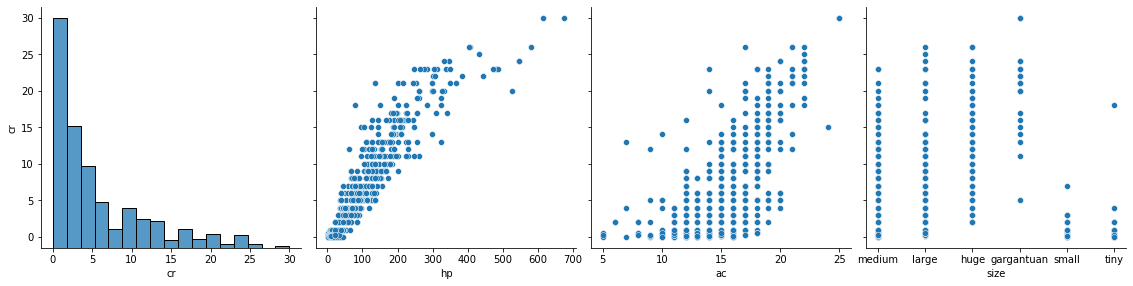

In [13]:
# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns

# Using pairplot we'll visualize the data for correlation
sns.pairplot(df, x_vars=['cr', 'hp','ac', 'size'], 
             y_vars='cr', height=4, aspect=1, kind='scatter')
plt.show()


## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [16]:

# Creating X and y
X = df['cr']
y = df['hp']

# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

# Take a look at the train dataset
X_train
y_train

602     1
734    51
100    18
264    13
211    17
       ..
578    13
53     85
350    65
79     52
520    42
Name: hp, Length: 533, dtype: int64

In [17]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     hp   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     3355.
Date:                Fri, 04 Feb 2022   Prob (F-statistic):          1.21e-231
Time:                        12:24:04   Log-Likelihood:                -2634.8
No. Observations:                 533   AIC:                             5274.
Df Residuals:                     531   BIC:                             5282.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.4310      1.961      5.319      0.000       6.578      14.284
cr            13.8817      0.240     57.919      0.000      13.411      14.353
==============================================================================
Omnibus:                      221.145   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4591.144
Skew:                           1.293   Prob(JB):                         0.00
Kurtosis:                      17.144   Cond. No.                         11.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

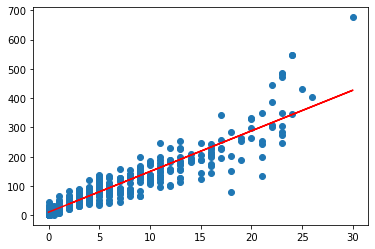

In [19]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 10.4310 + 13.8817*X_train, 'r')
plt.show()

## Error Terms

Finally, plot your error terms!

/Users/courtneyfrey/Python/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


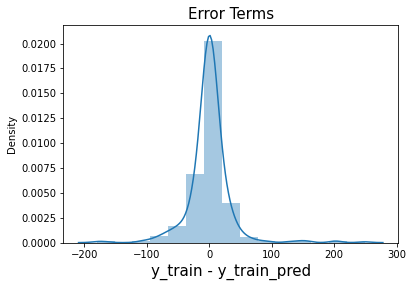

In [20]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 
 >0.863
 
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? 
> yes

3. Was your plot of the error terms a bell curve?
> yes